# Swallow neural networks

### 2017010055 박현일

In [1]:
import numpy as np
import keras.models as models
import keras.layers as layers
import keras.metrics as metrics
from matplotlib import pyplot as plt

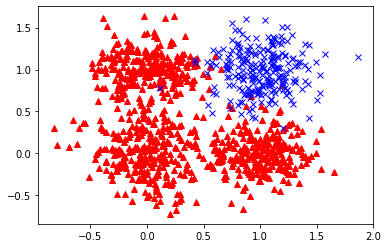

In [2]:
x_seeds = np.array([(0,0), (1,0), (0,1), (1,1)], dtype=np.float64)
y_seeds = np.array([0,0,0,1])

N = 1000
idxs = np.random.randint(0,4,N)

X = x_seeds[idxs]
Y = y_seeds[idxs]

X += np.random.normal(scale = 0.25, size = X.shape)

idxs_1 = np.where(Y == 1)
idxs_0 = np.where(Y == 0)

X_0 = X[idxs_0]
Y_0 = Y[idxs_0]

X_1 = X[idxs_1]
Y_1 = Y[idxs_1]

plt.plot(X_0[:, 0], X_0[:, 1], "r^")
plt.plot(X_1[:, 0], X_1[:, 1], "bx")
plt.show()

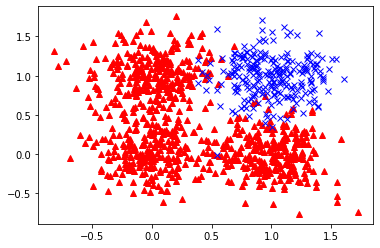

In [11]:
x_seeds_test = np.array([(0,0), (1,0), (0,1), (1,1)], dtype=np.float64)
y_seeds_test = np.array([0,0,0,1])

N = 1000
idxs_test = np.random.randint(0,4,N)

X_test = x_seeds_test[idxs_test]
Y_test = y_seeds_test[idxs_test]

X_test += np.random.normal(scale = 0.25, size = X_test.shape)

idxs_1_test = np.where(Y_test == 1)
idxs_0_test = np.where(Y_test == 0)

X_0_test = X_test[idxs_0_test]
Y_0_test = Y_test[idxs_0_test]

X_1_test = X_test[idxs_1_test]
Y_1_test = Y_test[idxs_1_test]

plt.plot(X_0_test[:, 0], X_0_test[:, 1], "r^")
plt.plot(X_1_test[:, 0], X_1_test[:, 1], "bx")
plt.show()

In [4]:
class_weight = {0:0.25, 1:0.25}

In [5]:
model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_shape=(2,)))
#model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [7]:
hist = model.fit(X, Y, epochs=50, class_weight=class_weight)

Epoch 1/50
32/32 [==============================] - 1s 1ms/step - loss: 0.2181 - accuracy: 0.3960
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2129 - accuracy: 0.4030
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 0.2080 - accuracy: 0.4100
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.2033 - accuracy: 0.4250
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1988 - accuracy: 0.4300
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 0.1944 - accuracy: 0.4350
Epoch 7/50
32/32 [==============================] - 0s 1ms/step - loss: 0.1903 - accuracy: 0.4420
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 0.1864 - accuracy: 0.4550
Epoch 9/50
32/32 [==============================] - 0s 1ms/step - loss: 0.1826 - accuracy: 0.4670
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1790 - accuracy: 0.4750
Epoch 11/50
32/32 [

In [14]:
model.predict(X, verbose=0).round()

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],

In [12]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.9320


[0.47508832812309265, 0.9319999814033508]

In [13]:
hist.history

{'accuracy': [0.3959999978542328,
  0.40299999713897705,
  0.4099999964237213,
  0.42500001192092896,
  0.4300000071525574,
  0.4350000023841858,
  0.44200000166893005,
  0.45500001311302185,
  0.46700000762939453,
  0.4749999940395355,
  0.4830000102519989,
  0.48500001430511475,
  0.4959999918937683,
  0.5099999904632568,
  0.5299999713897705,
  0.5460000038146973,
  0.5630000233650208,
  0.5789999961853027,
  0.5920000076293945,
  0.6039999723434448,
  0.6209999918937683,
  0.6340000033378601,
  0.6460000276565552,
  0.6710000038146973,
  0.6880000233650208,
  0.6990000009536743,
  0.7179999947547913,
  0.7319999933242798,
  0.7509999871253967,
  0.7670000195503235,
  0.7820000052452087,
  0.7960000038146973,
  0.8090000152587891,
  0.8289999961853027,
  0.8410000205039978,
  0.859000027179718,
  0.875,
  0.8830000162124634,
  0.8899999856948853,
  0.9010000228881836,
  0.9139999747276306,
  0.9210000038146973,
  0.921999990940094,
  0.9279999732971191,
  0.9309999942779541,
  0.935